# Zadania do tematu "Klasyfikacja"

W tym Notebooku znajdują się zadania do tematu "Klasyfikacja", aby pokazać implementację i działanie algorytmów do klasyfikacji.

# Zbiór danych

Będziemy korzystać ze zbioru danych "Stroke Diagnosis Dataset" dostępnego pod linkiem https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/data. Jeżeli ktoś ma konto na Kaggle to może pobrać dane w postaci .csv z tej platformy, a w innym przypadku można pobrać odpowiedni plik .csv z repozytorium do kursu (w folderze z zadaniami Tasks jest podfolder dane, a w nim plik `healthcare-dataset-stroke-data.csv`).

## Opis
Według Światowej Organizacji Zdrowia (WHO) udar jest drugą najczęstszą przyczyną zgonów na świecie i odpowiada za około 11% wszystkich zgonów.
Ten zbiór danych służy do przewidywania, czy pacjent może doznać udaru na podstawie parametrów wejściowych, takich jak płeć, wiek, różne choroby i palenie tytoniu. Każdy wiersz danych zawiera istotne informacje o pacjencie. (opis z Kaggle)

## Opis poszczególnych kolumn:
- **id** - Unikalny identyfikator (ID).  
- **gender** - Płeć: "Male" (Mężczyzna), "Female" (Kobieta) lub "Other" (Inna).  
- **age** - Wiek pacjenta.  
- **hypertension** - Nadciśnienie: 0, jeśli pacjent nie ma nadciśnienia, 1, jeśli pacjent ma nadciśnienie.  
- **heart_disease** - Choroby serca: 0, jeśli pacjent nie ma chorób serca, 1, jeśli pacjent ma chorobę serca.  
- **ever_married** - Czy kiedykolwiek był żonaty/zamężna: "No" (Nie) lub "Yes" (Tak).  
- **work_type** - Rodzaj pracy: "children" (dzieci), "Govt_job" (Praca w sektorze rządowym), "Never_worked" (Nigdy nie pracował), "Private" (Sektor prywatny) lub "Self-employed" (Praca na własny rachunek).  
- **Residence_type** - Typ miejsca zamieszkania: "Rural" (Wiejska) lub "Urban" (Miejska).  
- **avg_glucose_level** - Średni poziom glukozy we krwi (Średni poziom glukozy).  
- **bmi** - Wskaźnik masy ciała (BMI).  
- **smoking_status** - Status palenia: "formerly smoked" (kiedyś palił), "never smoked" (nigdy nie palił), "smokes" (pali) lub "Unknown" (Nieznane).  
  *Uwaga*: "Unknown" w **smoking_status** oznacza, że informacja jest niedostępna dla tego pacjenta.  
- **stroke** - Udar: 1, jeśli pacjent miał udar, lub 0, jeśli nie. **Jest to zmienna docelowa, która będzie podlegała predykcji**  


# 1. Wczytaj dane z pliku do postaci pandas DataFrame. Następnie wykorzystaj head(), żeby wyświetlić pierwsze 5 wierszy.

In [2]:
import pandas as pd
# Wpisz swój kod poniżej
import os

df = pd.read_csv(os.path.join('dane', 'healthcare-dataset-stroke-data.csv'))
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# 2. Sprawdź czy nie występują braki w zbiorze danych (użyj `.info()`). Jeżeli jakiś wiersz nie ma wartości to go usuń.

W późniejszych tematach poznamy inne metody radzenia sobie z tym problemem.

Do usuwania służy `dropna()`.

In [4]:
# Wpisz swój kod poniżej
df.info()
df.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# 3. Podziel zbiór danych na wartość poszukiwaną y i dane X. Następnie podziel dane na zbiór treningowy, walidacyjny i testowy w stosunku 80:10:10. Użyj random_state=42

In [6]:
from sklearn.model_selection import train_test_split
# Wpisz swój kod poniżej
X = df.drop(['stroke'], axis=1)
y = df['stroke']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 4. Wyświetl typy danych w każdej kolumnie zbioru treningowego, a następnie wykorzystaj `LabelEncoder`, aby we wszystkich kolumnach były dane numeryczne. Pamiętaj, żeby zrobić to również dla zmiennej docelowej

Przykład implementacji `LabelEncoder`
```Python
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df1['kolumna'] = encoder.fit_transform(df1['kolumna'])
df2['kolumna'] = encoder.transform(df2['kolumna'])
```
Pamiętaj, żeby używać `fit_transform` jedynie na zbiorze treningowym, a następnie tym samym enkoderem jedynie transformować wartości w zbiorach walidacyjnym i testowym.

Istnieje możliwość sprawdzenia czemu odpowiada dana wartość liczbowa. Aby to zrobić można wywołać (w tym przypadku sprawdzimy co zostało zakodowane jako `0` i `1`, ale można to dowolnie zmienić):
```Python
le.inverse_transform([0, 1])
```

Warto byłoby zapisać enkodery poszczególnych kolumn do słownika, żeby potem móc sprawdzić co się kryje pod poszczególnymi numerami.

In [7]:
from sklearn.preprocessing import LabelEncoder
# Wpisz swój kod poniżej

encoders = {}
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        le = LabelEncoder()
        encoders[col] = le
        X_train[col] = le.fit_transform(X_train[col])
        X_val[col] = le.transform(X_val[col])
        X_test[col] = le.transform(X_test[col])

print(X_train.dtypes)

id                     int64
gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
dtype: object


# 5. Utwórz macierz korelacji (i wyświetl w formie heatmapy), aby zbadać jakie powiązania występują pomiędzy poszczególnymi kolumnami.

Do złączenia `X_train` i `y_train` możesz wykorzystać poniższy fragment kodu:
```Python
y_train_series = pd.Series(y_train, name='stroke', index=X_train.index)
all_data = pd.concat([X_train, y_train_series], axis=1)
```
Do wyliczenia macierzy korelacji możesz skorzystać z `df.corr()`


<Axes: >

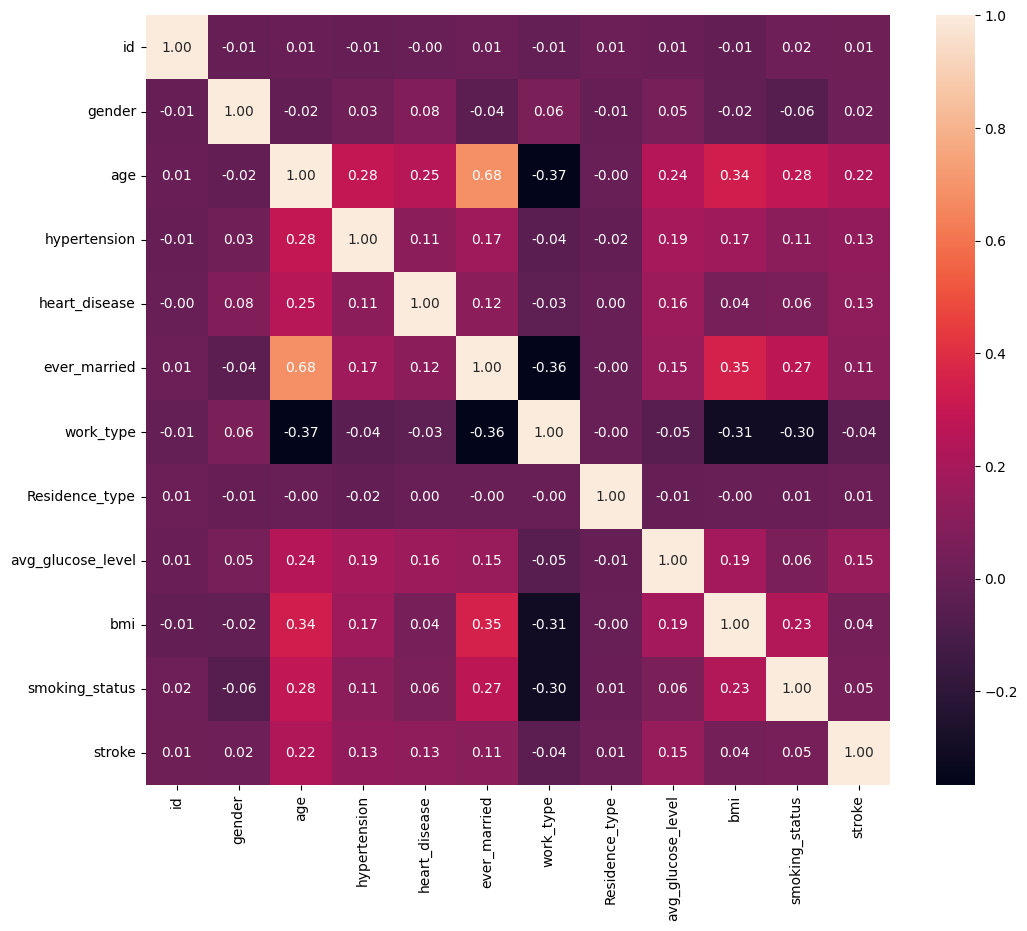

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns
# Wpisz swój kod poniżej
y_train_series = pd.Series(y_train, name='stroke', index=X_train.index)
all_data = pd.concat([X_train, y_train_series], axis=1)

corr = all_data.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True, fmt='.2f')

# 6. Utwórz punkt odniesienia dla późniejszych modeli. Sprawdź jaki jest udział pacjentów z udarem do wszystkich pacjentów w zbiorze treningowym (możesz policzyć średnią wartość), a następnie losowo wygeneruj informację o udarze dla zbioru walidacyjnego i testowego (z prawdopodobieństwem wynikającym z wyliczonego stosunku). Następnie oblicz `accuracy_score` dla wyniku na zbiorze walidacyjnym.

Możesz wykorzystać `np.random.choice`. Dokumentacja dostępna jest [tutaj](https://numpy.org/doc/2.0/reference/random/generated/numpy.random.choice.html).

In [14]:
from sklearn.metrics import accuracy_score
import numpy as np

np.random.seed(42)
# Wpisz swój kod poniżej
stroke_rate = y_train.mean()
print(f"Udział pacjentów z udarem w zbiorze treningowym: {stroke_rate:.4f}")

y_val_pred = np.random.choice([0, 1], size=len(y_val), p=[1-stroke_rate, stroke_rate])
y_test_pred = np.random.choice([0, 1], size=len(y_test), p=[1-stroke_rate, stroke_rate])

accuracy = accuracy_score(y_val, y_val_pred)
print(f"Accuracy na zbiorze walidacyjnym dla modelu bazowego: {accuracy:.4f}")

Udział pacjentów z udarem w zbiorze treningowym: 0.0397
Accuracy na zbiorze walidacyjnym dla modelu bazowego: 0.9084


# 7. Utwórz i wytrenuj klasyfikator o strukturze drzewa decyzyjnego `DecisionTreeClassifier`. Dokonaj predykcję i oblicz dokładność na zbiorze walidacyjnym i testowym.

Pamiętaj, żeby ustawić `random_state=42`.

Dokumentacja dla `DecisionTreeClassifier` dostępna jest [tutaj](https://scikit-learn.org/1.5/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)

In [15]:
from sklearn.tree import DecisionTreeClassifier
# Wpisz swój kod poniżej

dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf = dt_clf.fit(X_train, y_train)

val_pred_dt = dt_clf.predict(X_val)
test_pred_dt = dt_clf.predict(X_test)

val_accuracy_dt = accuracy_score(y_val, val_pred_dt)
test_accuracy_dt = accuracy_score(y_test, test_pred_dt)

print("Accuracy na zbiorze walidacyjnym dla drzewa decyzyjnego:", val_accuracy_dt)

Accuracy na zbiorze walidacyjnym dla drzewa decyzyjnego: 0.9266802443991853


# 8. Wygeneruj graf drzewa z poprzedniego zadania.

Dokumentacja `plot_tree` dostępna jest [tutaj](https://scikit-learn.org/1.5/modules/generated/sklearn.tree.plot_tree.html)

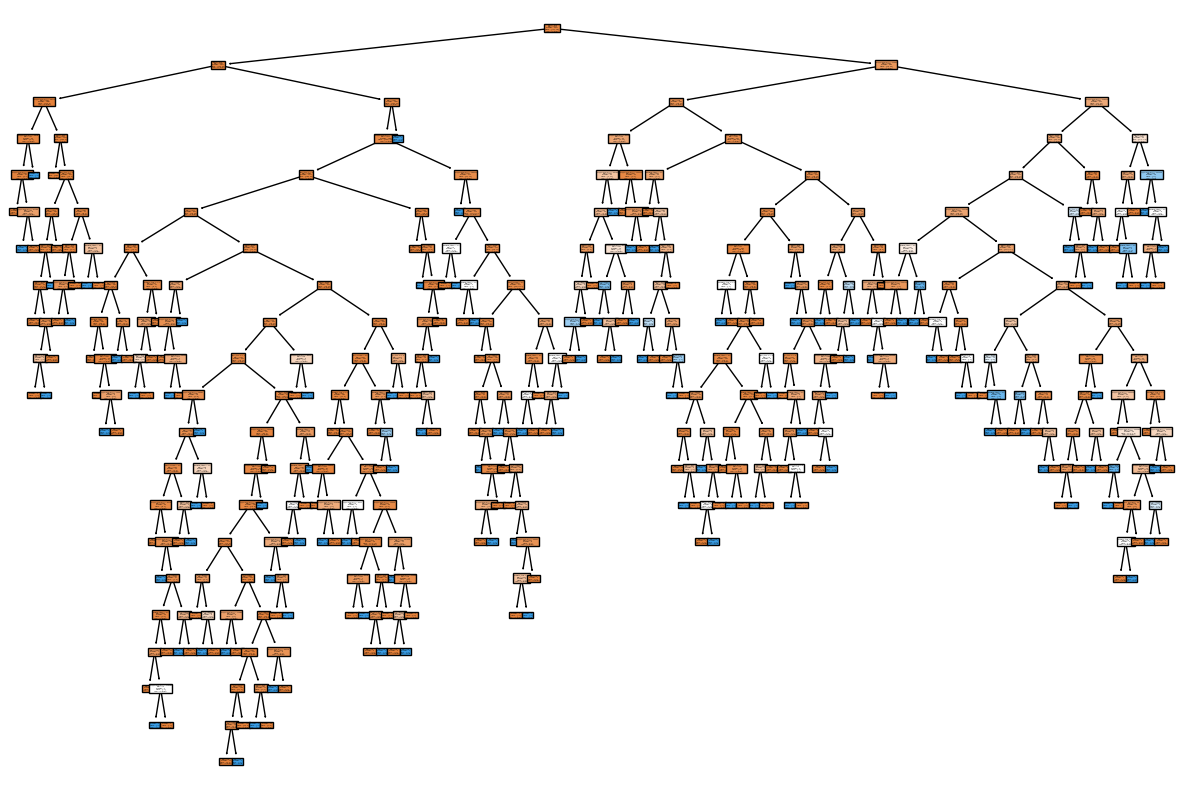

In [16]:
from sklearn.tree import plot_tree
# Wpisz swój kod poniżej

plt.figure(figsize=(15,10))
plot_tree(dt_clf, filled=True, feature_names=X_train.columns, class_names=["No stroke", "Stroke"])
plt.show()

# 9. Utwórz i wytrenuj klasyfikator o strukturze lasu losowego `RandomForestClassifier`. Dokonaj predykcję i oblicz dokładność na zbiorze walidacyjnym i testowym.

Pamiętaj, żeby ustawić `random_state=42`.

Dokumentacja dla `RandomForestClassifier` dostępna jest [tutaj](https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

In [17]:
from sklearn.ensemble import RandomForestClassifier
# Wpisz swój kod poniżej

rf_clf = RandomForestClassifier(random_state=42)
rf_clf = rf_clf.fit(X_train, y_train)

val_pred_rf = rf_clf.predict(X_val)
test_pred_rf = rf_clf.predict(X_test)

val_accuracy_rf = accuracy_score(y_val, val_pred_rf)
test_accuracy_rf = accuracy_score(y_test, test_pred_rf)

print("Accuracy na zbiorze walidacyjnym dla lasu losowego:", val_accuracy_rf)

Accuracy na zbiorze walidacyjnym dla lasu losowego: 0.9531568228105907


# 10. Utwórz i wytrenuj klasyfikator o strukturze k najbliższych sąsiadów `KNeighborsClassifier`. Dokonaj predykcję i oblicz dokładność na zbiorze walidacyjnym i testowym.

Przyjmij `n_neighbors=5` sąsiadów.

Dokumentacja dla `KNeighborsClassifier` dostępna jest [tutaj](https://scikit-learn.org/1.5/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
# Wpisz swój kod poniżej

knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf = knn_clf.fit(X_train, y_train)

val_pred_knn = knn_clf.predict(X_val)
test_pred_knn = knn_clf.predict(X_test)

val_accuracy_knn = accuracy_score(y_val, val_pred_knn)
test_accuracy_knn = accuracy_score(y_test, test_pred_knn)

print("Accuracy na zbiorze walidacyjnym dla k najbliższych sąsiadów:", val_accuracy_knn)

Accuracy na zbiorze walidacyjnym dla k najbliższych sąsiadów: 0.9531568228105907


# 11. Utwórz i wytrenuj klasyfikator o strukturze SVM `SVC`. Dokonaj predykcję i oblicz dokładność na zbiorze walidacyjnym i testowym.

Pamiętaj, żeby ustawić `random_state=42`.

Dokumentacja dla `SVC` dostępna jest [tutaj](https://scikit-learn.org/1.5/modules/generated/sklearn.svm.SVC.html)

In [26]:
from sklearn.svm import SVC
# Wpisz swój kod poniżej

svc_clf = SVC(random_state=42)
svc_clf = svc_clf.fit(X_train, y_train)

val_pred_svc = svc_clf.predict(X_val)
test_pred_svc = svc_clf.predict(X_test)

val_accuracy_svc = accuracy_score(y_val, val_pred_svc)
test_accuracy_svc = accuracy_score(y_test, test_pred_svc)

print("Accuracy na zbiorze walidacyjnym dla support vector machine:", val_accuracy_svc)

Accuracy na zbiorze walidacyjnym dla support vector machine: 0.9531568228105907


# 12. Oprócz wykorzystania pojedynczych klasyfikatorów istnieje możliwość wykorzystania kilku klasyfikatorów, które mogą głosować nad wynikiem klasyfikacji. Wykorzystaj wcześniejsze modele, aby utworzyć `VotingClassifier`. Dokonaj predykcję i oblicz dokładność na zbiorze walidacyjnym i testowym.

Pamiętaj, żeby ustawić `random_state=42`. Wykorzystaj też sposób głosowania `voting='hard'` - jest to konieczne, ponieważ `soft` wymaga zwrócenia prawdopodobieństwa, co nie jest możliwe dla SVC. Możliwa jest również zmiana wag głosów poszczególnych klasyfikatorów, ale na razie zostawmy wszystkim równe.

Dokumentacja dla `VotingClassifier` dostępna jest [tutaj](https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.VotingClassifier.html#sklearn.ensemble.VotingClassifier)

In [28]:
from sklearn.ensemble import VotingClassifier
# Wpisz swój kod poniżej

voting_clf = VotingClassifier(estimators=[('dt', dt_clf), ('rf', rf_clf), ('knn', knn_clf), ('svc', svc_clf)],
                              voting = 'hard'
                              )

voting_clf = voting_clf.fit(X_train, y_train)

val_pred_voting = voting_clf.predict(X_val)
test_pred_voting = voting_clf.predict(X_test)

val_accuracy_voting = accuracy_score(y_val, val_pred_voting)
test_accuracy_voting = accuracy_score(y_test, test_pred_voting)

print("Accuracy na zbiorze walidacyjnym dla voting classifier:", val_accuracy_voting)

Accuracy na zbiorze walidacyjnym dla voting classifier: 0.9531568228105907


# 13: Utwórz macierz pomyłek `confusion_matrix` i wykorzystaj pełność, precyzję i F1 score do oceny modelu lasu losowego. Czy błędy modelu polegające na klasyfikacji jako `0` (brak udaru), gdy powinno być `1`, nie brzmi niebezpiecznie?

[[468   0]
 [ 23   0]]


Text(50.722222222222214, 0.5, 'Dane rzeczywiste')

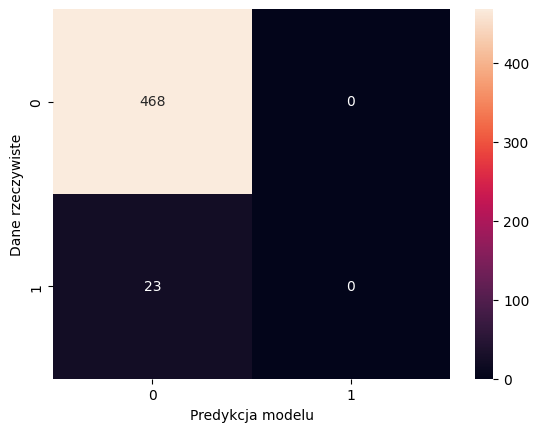

In [ ]:
from sklearn.metrics import confusion_matrix
# Wpisz swój kod poniżej

confusion_mat = confusion_matrix(y_val, val_pred_rf)
print(confusion_mat)

sns.heatmap(confusion_mat, annot=True, fmt="d")
plt.xlabel('Predykcja modelu')
plt.ylabel('Dane rzeczywiste')

In [ ]:
from sklearn.metrics import recall_score, f1_score, precision_score
# Wpisz swój kod poniżej

recall_rf = recall_score(y_val, val_pred_rf)
f1_rf = f1_score(y_val, val_pred_rf)
precision_rf = precision_score(y_val, val_pred_rf)

print("Recall score", recall_rf, ", F1", f1_rf, ", precission", precision_rf)

Recall score 0.0 , F1 0.0 , precission 0.0


/home/marcin/zadania_kurs_ml/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# 14: Optymalizacja Hiperparametrów Modelu Random Forest za pomocą RandomizedSearchCV

## Kroki

1. Dostosuj `RandomizedSearchCV` z wybranymi hiperparametrami:
   - `n_estimators`, `max_depth`, `min_samples_split`, `min_samples_leaf`, `bootstrap`.
2. Ustaw liczbę iteracji na `50`, ilość crossvalidacji na `5`, a metrykę na `recall`.
3. Znajdź najlepsze hiperparametry i przetestuj zoptymalizowany model na zbiorach walidacyjnym i testowym.


- [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)



In [ ]:
from sklearn.model_selection import cross_val_score
# Wpisz swój kod poniżej

cross_val_scores = cross_val_score(rf_clf, X_train, y_train, cv=3, scoring="accuracy")
print(cross_val_scores)

[0.95951108 0.96027502 0.95951108]


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]

}

# Wpisz swój kod poniżej

rf = RandomForestClassifier(random_state=42)

rs = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter = 50,
    cv=5,
    n_jobs = -1,
    scoring='f1'
)

rs.fit(X_train, y_train)

print(rs.best_params_)

{'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': False}


In [ ]:
best_model = RandomForestClassifier(
    n_estimators=rs.best_params_['n_estimators'],
    max_depth=rs.best_params_['max_depth'],
    min_samples_split=rs.best_params_['min_samples_split'],
    min_samples_leaf=rs.best_params_['min_samples_leaf'],
    bootstrap=rs.best_params_['bootstrap'],
    random_state=42
)

best_model.fit(X_train, y_train)

val_pred_best = best_model.predict(X_val)
test_pred_best = best_model.predict(X_test)

val_accuracy_best = accuracy_score(y_val, val_pred_best)
val_recall_best = recall_score(y_val, val_pred_best)
val_f1_best = f1_score(y_val, val_pred_best)
val_prec_best = precision_score(y_val, val_pred_best)

print("Accuracy", val_accuracy_best, "Recall score", val_recall_best, ", F1", val_f1_best, ", precission", val_prec_best)

Accuracy 0.9531568228105907 Recall score 0.0 , F1 0.0 , precission 0.0


/home/marcin/zadania_kurs_ml/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# 15: Wykonaj predykcję z wyliczeniem prawdopodobieństwa i utwórz próg o wartości `0.06`, a następnie utwórz nową predykcję, gdzie zaklasyfikujesz, że pacjent ma udar, jeżeli jego prawdopodobieństwo jest większe niż próg. Wylicz dokładność, pełność, F1 score i precyzję i wyświetl macierz pomyłek. Czy takie predykcje są lepsze niż bez zastosowania progu?

Do predykcji z podaniem prawdopobieństwa wykorzystać `predict_proba`.

Accuracy 0.7759674134419552 Recall score 0.5652173913043478 , F1 0.19117647058823528 , precision 0.11504424778761062


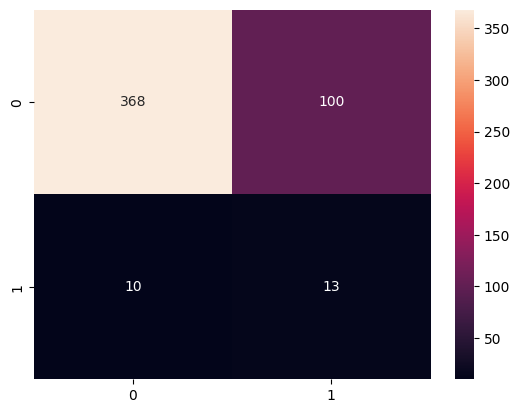

In [ ]:
# Wpisz swój kod poniżej
best_pred_with_proba = best_model.predict_proba(X_val)

probs = best_pred_with_proba[:, 1]
threshold = 0.06
new_prediction = (probs >= threshold)

val_accuracy_new = accuracy_score(y_val, new_prediction)
val_recall_new = recall_score(y_val, new_prediction)
val_f1_new = f1_score(y_val, new_prediction)
val_precision_new = precision_score(y_val, new_prediction)

print("Accuracy", val_accuracy_new, "Recall score", val_recall_new, ", F1", val_f1_new, ", precision", val_precision_new)
confusion_mat_new = confusion_matrix(y_val, new_prediction)

sns.heatmap(confusion_mat_new, annot=True, fmt="d")
plt.show()